In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2022-12-04 20:58:38.044080: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 5s 14ms/step - loss: 0.6918 - accuracy: 0.5515 - val_loss: 0.6903 - val_accuracy: 0.5838
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6867 - accuracy: 0.6168 - val_loss: 0.6824 - val_accuracy: 0.6500
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6655 - accuracy: 0.6575 - val_loss: 0.6356 - val_accuracy: 0.6460
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5932 - accuracy: 0.7201 - val_loss: 0.5774 - val_accuracy: 0.7438
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5596 - accuracy: 0.7512 - val_loss: 0.5526 - val_accuracy: 0.7524
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5355 - accuracy: 0.7642 - val_loss: 0.5297 - val_accuracy: 0.7604
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5141 - accuracy: 0.7700 - val_loss: 0.5105 - val_accuracy: 0.7716
Epoc

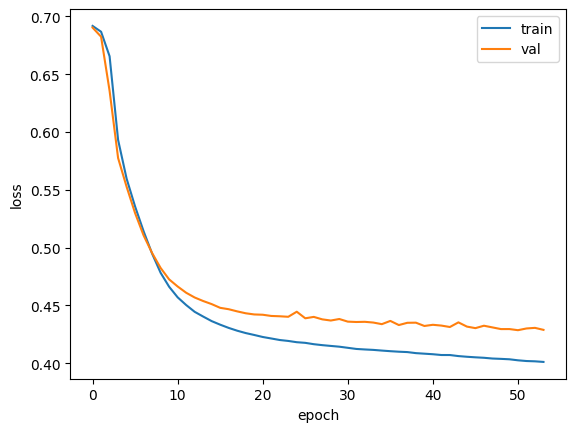

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 6, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6929 - accuracy: 0.5132 - val_loss: 0.6926 - val_accuracy: 0.5338
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6918 - accuracy: 0.5427 - val_loss: 0.6911 - val_accuracy: 0.5968
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6890 - accuracy: 0.6130 - val_loss: 0.6867 - val_accuracy: 0.6166
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6729 - accuracy: 0.6291 - val_loss: 0.6454 - val_accuracy: 0.6330
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6165 - accuracy: 0.6978 - val_loss: 0.6034 - val_accuracy: 0.7048
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5950 - accuracy: 0.7136 - val_loss: 0.5863 - val_accuracy: 0.7250
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5785 - accuracy: 0.7262 - val_loss: 0.5689 - val_accuracy:

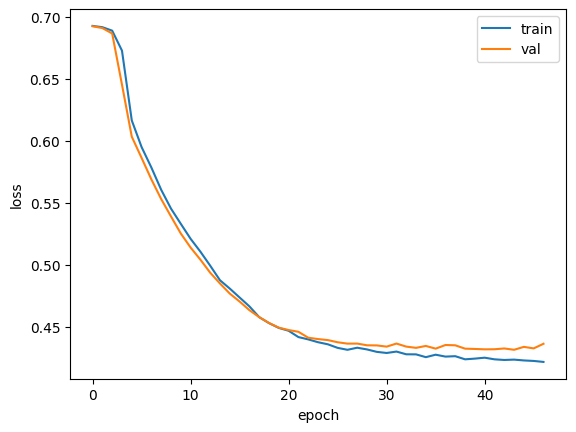

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.6929 - accuracy: 0.5207 - val_loss: 0.6925 - val_accuracy: 0.5762
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6919 - accuracy: 0.5694 - val_loss: 0.6905 - val_accuracy: 0.6224
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6865 - accuracy: 0.6265 - val_loss: 0.6796 - val_accuracy: 0.6454
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6537 - accuracy: 0.6675 - val_loss: 0.6195 - val_accuracy: 0.7018
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5918 - accuracy: 0.7171 - val_loss: 0.5783 - val_accuracy: 0.7216
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5591 - accuracy: 0.7362 - val_loss: 0.5498 - val_accuracy: 0.7404
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5351 - accuracy: 0.7477 - val_loss: 0.5257 - val_accuracy

InvalidArgumentError: Graph execution error:

Detected at node 'RMSprop/RMSprop/update_5/truediv' defined at (most recent call last):
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/4p/blmn2snd51lbm787ttprr8m00000gn/T/ipykernel_10954/668584452.py", line 5, in <module>
      history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/engine/training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 579, in minimize
      return self.apply_gradients(grads_and_vars, name=name)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 738, in apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 797, in _distributed_apply
      update_op = distribution.extended.update(
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 776, in apply_grad_to_update_var
      update_op = self._resource_apply_dense(grad, var, **apply_kwargs)
    File "/Users/araina/Library/Python/3.9/lib/python/site-packages/keras/optimizers/optimizer_v2/rmsprop.py", line 241, in _resource_apply_dense
      var_t = var - coefficients["lr_t"] * grad / (
Node: 'RMSprop/RMSprop/update_5/truediv'
Incompatible shapes: [0] vs. [8,32]
	 [[{{node RMSprop/RMSprop/update_5/truediv}}]] [Op:__inference_train_function_178348]

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()